In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("heart_2022_with_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [4]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

## **Data Cleaning**

In [6]:
df = df.dropna(subset=['HadHeartAttack'])
df.shape
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [7]:
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,442067,442067,440972,434026,441095,431057,442067,438479,440997,440630,...,386779,428369,433260,396130,376757,395590,365857,360493,392082,391940
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,25997,234519,147967,348653,335778,232493,416959,412331,422101,374481,...,222305,318782,46808,210023,248383,208059,214407,120549,374996,268266


In [8]:
for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-------------------------------------------------')

Column Name:  State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
-------------------------------------------------
Column Name:  Sex
['Female' 'Male']
-------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
-------------------------------------------------
Column Name:  LastCheckupTime
['Within past year (anytime less than 12 

### **Editing some data**

In [9]:
df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'Borderline',
                            'Yes, but only during pregnancy (female)' : 'During Pregnancy'} , inplace=True)

df['HadDiabetes'].unique()

array(['Yes', 'No', 'Borderline', nan, 'During Pregnancy'], dtype=object)

In [10]:
df['SmokerStatus'].replace({'Current smoker - now smokes some days' : 'Current smoker(Some days)',
                                    'Current smoker - now smokes every day' : 'Current smoker(Every day)'}, inplace=True)

df['SmokerStatus'].unique()

array(['Never smoked', 'Current smoker(Some days)', 'Former smoker', nan,
       'Current smoker(Every day)'], dtype=object)

In [11]:
df['ECigaretteUsage'].replace({'Not at all (right now)' : 'Not at all',
                                        'Never used e-cigarettes in my entire life' : 'Never',
                                        'Use them every day' : 'Everyday',
                                        'Use them some days' : 'Somedays'}, inplace=True)

df['ECigaretteUsage'].unique()

array(['Not at all', 'Never', nan, 'Everyday', 'Somedays'], dtype=object)

In [12]:
df['RaceEthnicityCategory'].replace({'White only, Non-Hispanic' : 'White',
                                             'Black only, Non-Hispanic' : 'Black',
                                             'Other race only, Non-Hispanic' : 'Other Race',
                                             'Multiracial, Non-Hispanic' : 'Multi Racial'}, inplace=True)

df['RaceEthnicityCategory'].unique()

array(['White', 'Black', 'Other Race', 'Multi Racial', nan, 'Hispanic'],
      dtype=object)

In [13]:
df['AgeCategory'].replace({'Age 80 or older' : '80+'}, inplace=True)

for value in df['AgeCategory'].unique()[1:]:
    value = str(value)
    if value != 'nan':
        cat_value = value.split(" ")
        df['AgeCategory'].replace({value : cat_value[1]+"-"+cat_value[3]}, inplace=True)

df['AgeCategory'].unique()

array(['80+', '55-59', nan, '40-44', '75-79', '70-74', '65-69', '60-64',
       '50-54', '45-49', '35-39', '25-29', '30-34', '18-24'], dtype=object)

In [14]:
df['CovidPos'].replace({'Tested positive using home test without a health professional' : 'Yes'}, inplace=True)

df['CovidPos'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,442067,442067,440972,434026,441095,431057,442067,438479,440997,440630,...,386779,428369,433260,396130,376757,395590,365857,360493,392082,391940
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,2
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,White,65-69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,25997,234519,147967,348653,335778,232493,416959,412331,422101,374481,...,222305,318782,46808,210023,248383,208059,214407,120549,374996,268266


In [16]:
df[df.duplicated()]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
7310,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11503,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.7,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
28206,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29339,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35644,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411300,Washington,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427638,Wisconsin,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431351,Wisconsin,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431653,Wisconsin,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,431318.000000,433123.000000,436719.000000,413916.000000,400591.000000,393947.000000
mean,4.324093,4.372926,7.023193,1.702758,83.077508,28.527883
std,8.663460,8.373799,1.496600,0.107142,21.439351,6.550989
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.740000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


## **Insights from the data**

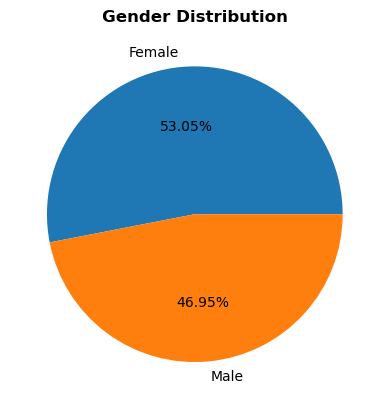

In [20]:
gender_count = df['Sex'].value_counts()
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

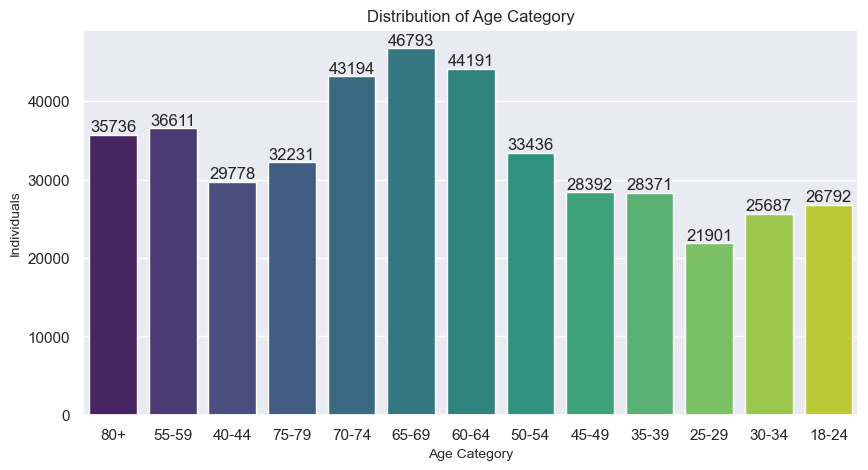

In [21]:
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')


x = sns.countplot(data=df, x='AgeCategory', palette='viridis')

plt.title("Distribution of Age Category", fontsize=12)
plt.xlabel("Age Category", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

for c in x.containers:
    x.bar_label(c)

plt.show()


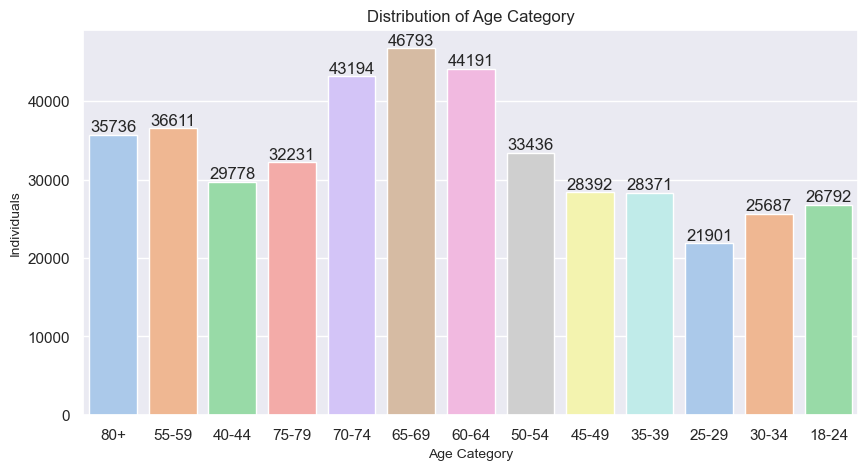

In [22]:
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')

# Use the palette parameter to set different colors for each column
x = sns.countplot(data=df, x='AgeCategory', palette='pastel')

plt.title("Distribution of Age Category", fontsize=12)
plt.xlabel("Age Category", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

for c in x.containers:
    x.bar_label(c)

plt.show()


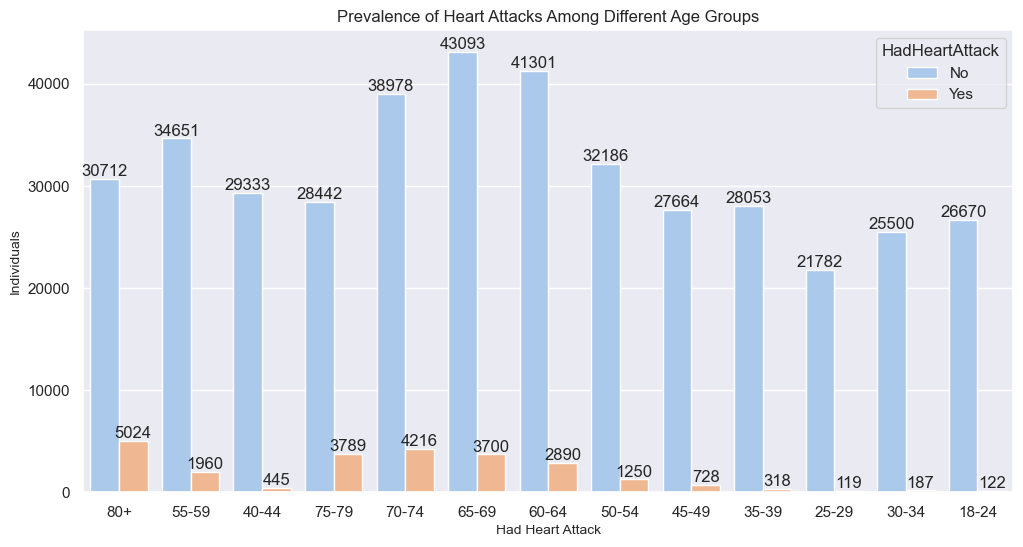

In [23]:
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
x = sns.countplot(data=df, x='AgeCategory', hue='HadHeartAttack', palette='pastel')
plt.title("Prevalence of Heart Attacks Among Different Age Groups", fontsize=12)
plt.xlabel("Had Heart Attack", fontsize=10)
plt.ylabel("Individuals", fontsize=10)
for c in x.containers:
    x.bar_label(c)

plt.show()

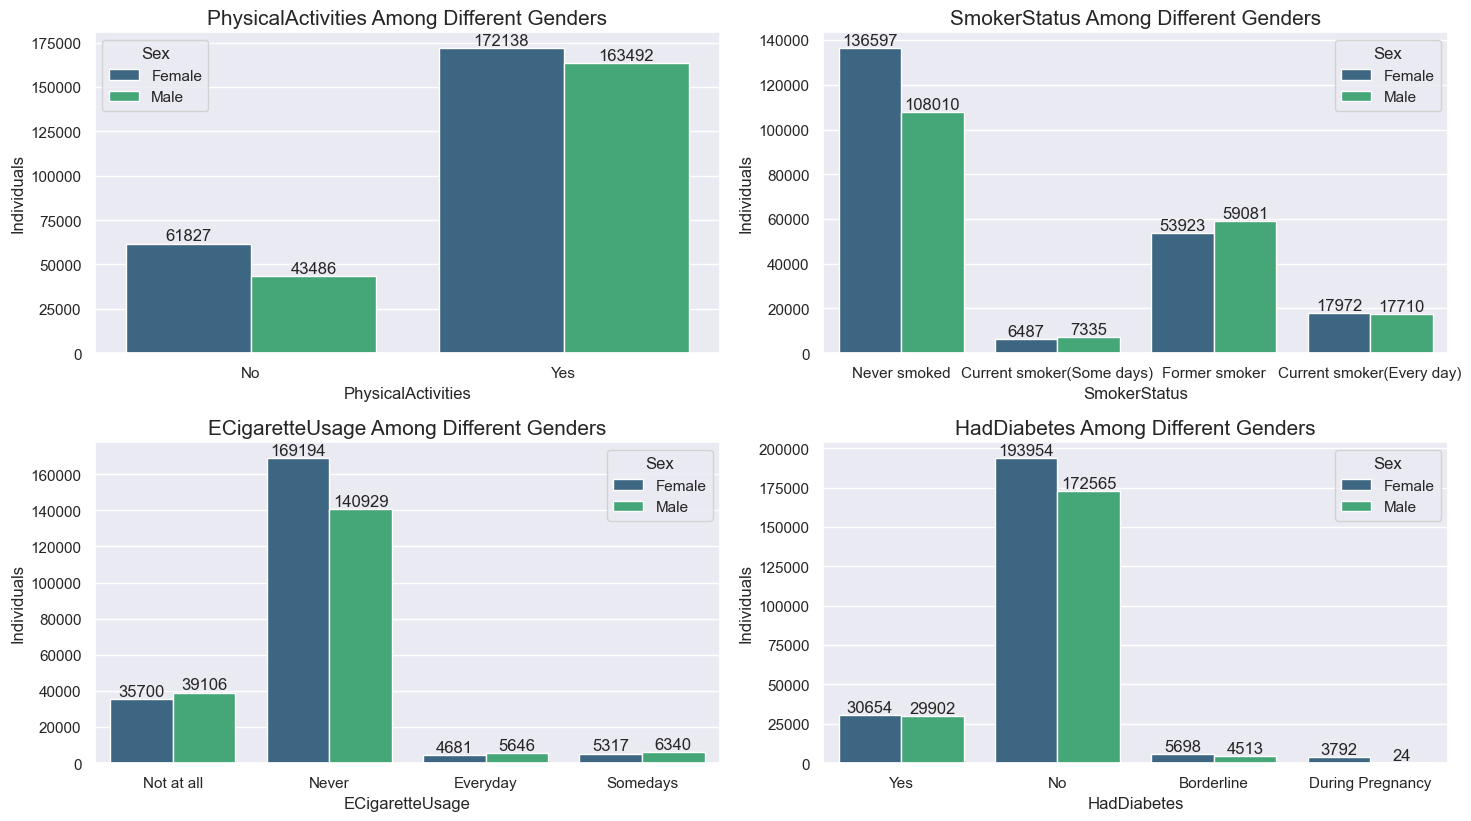

In [28]:
plt.figure(figsize=(15, 12))
sns.set(style='darkgrid')
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'HadDiabetes']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=df, x=risk_factor, hue='Sex', palette='viridis')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=15)
    plt.xlabel(risk_factor, fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

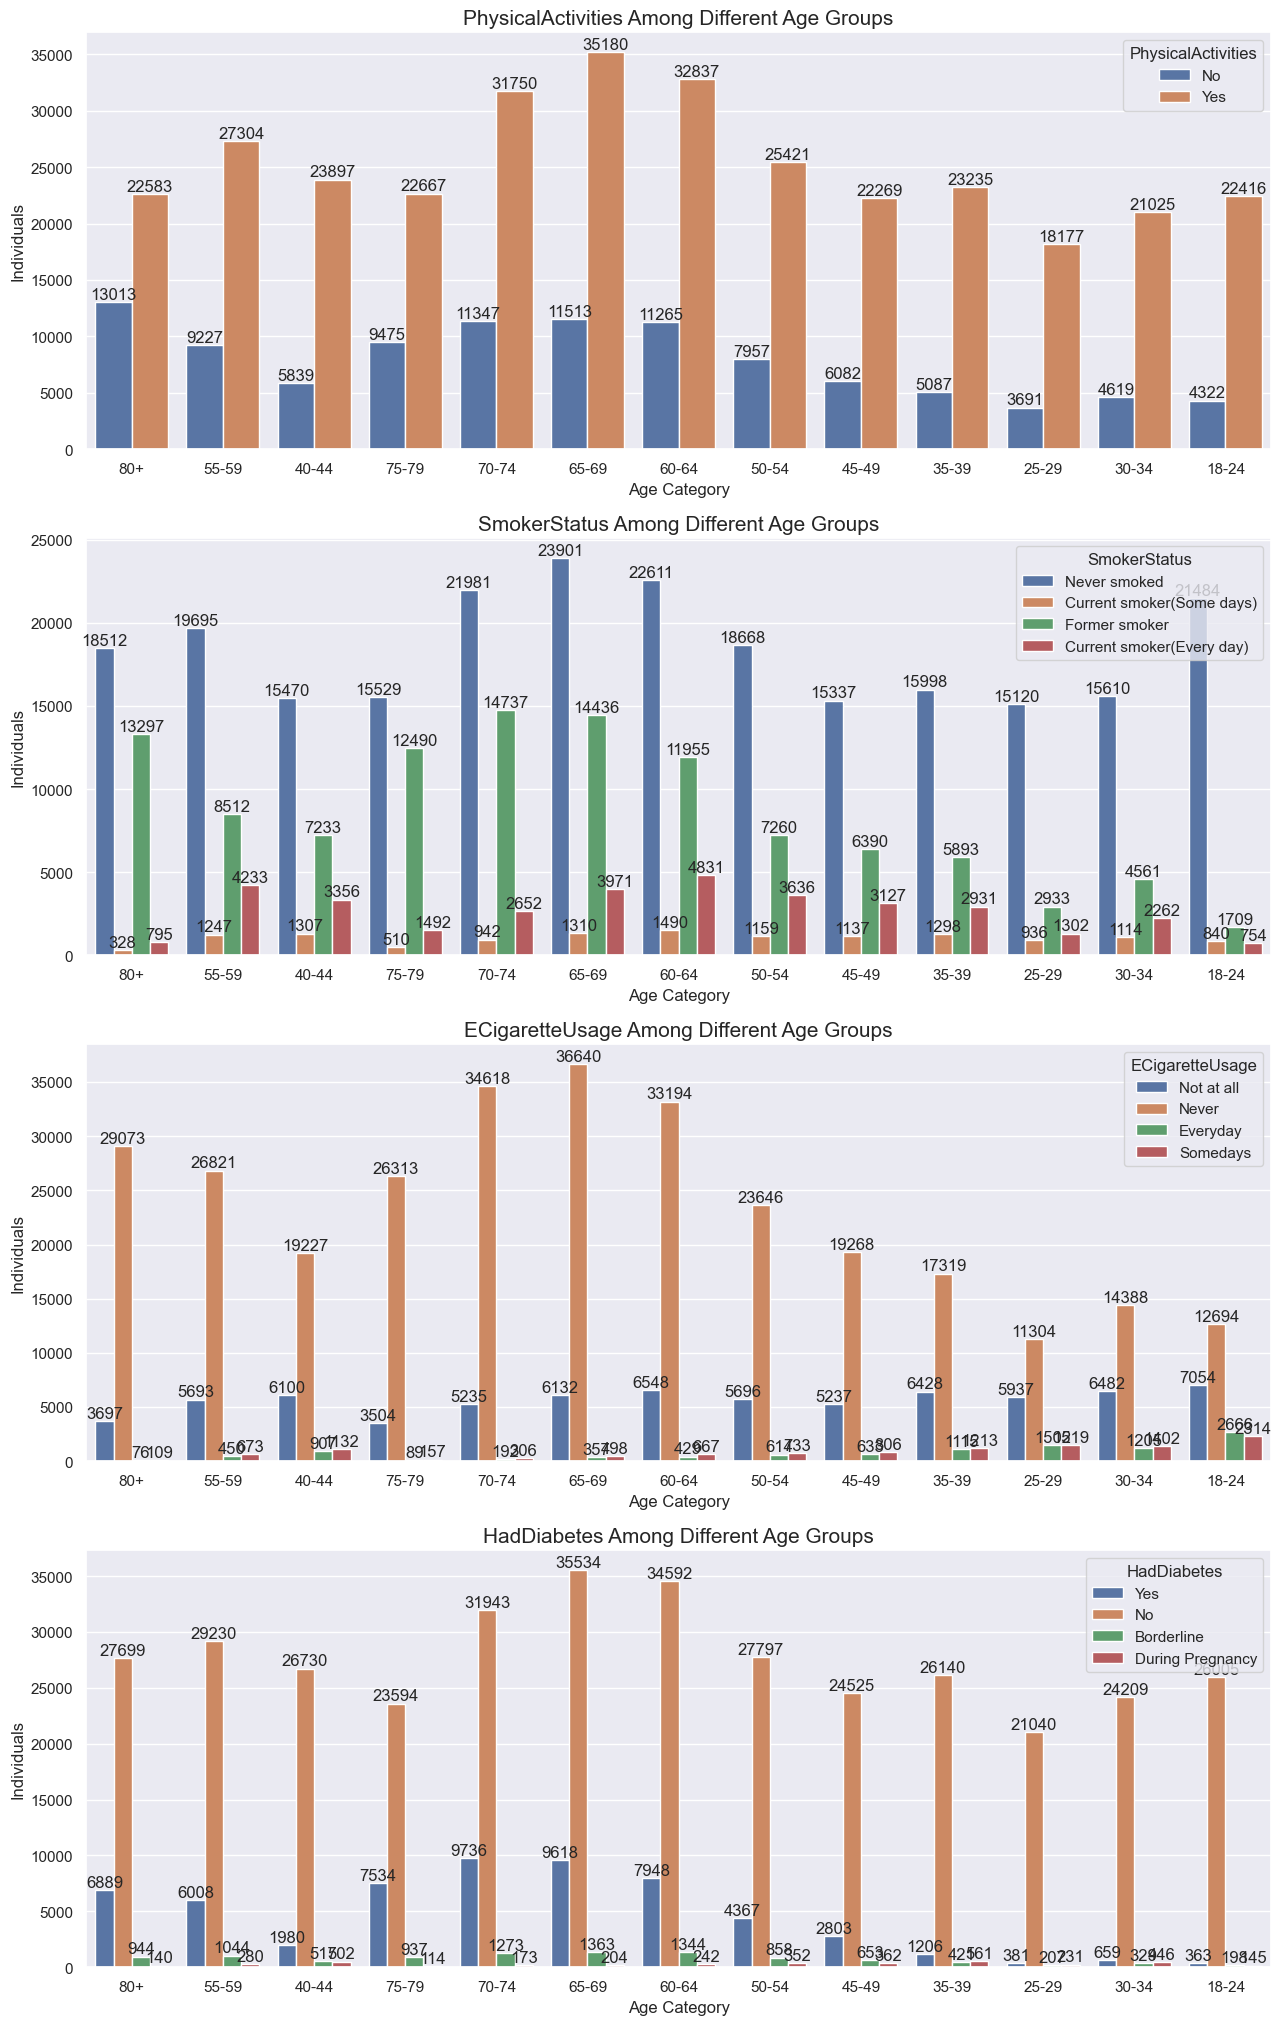

In [30]:
plt.figure(figsize=(13, 25))
sns.set(style='darkgrid')
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'HadDiabetes']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=df, x='AgeCategory', hue=risk_factor)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=15)
    plt.xlabel("Age Category", fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

## **Finding Outliers**

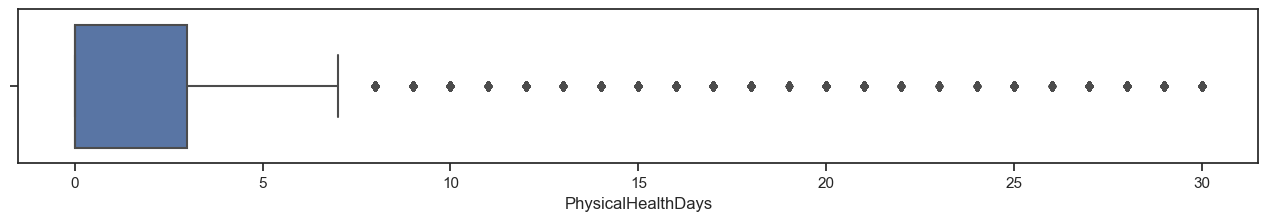

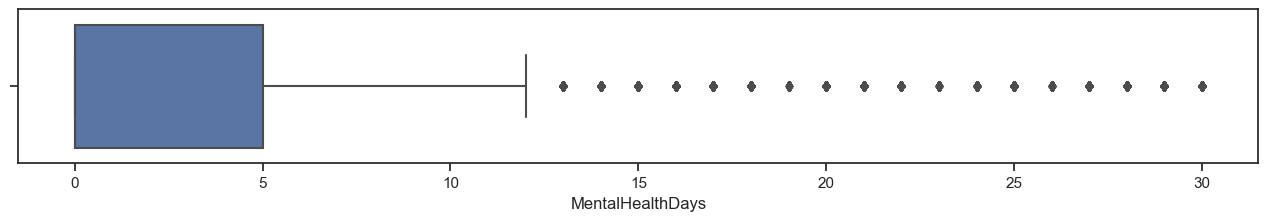

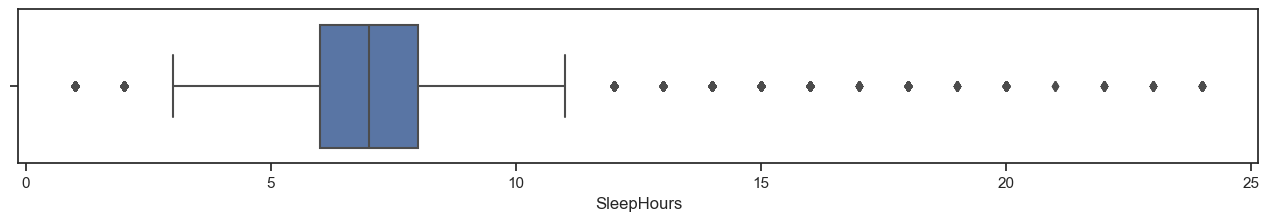

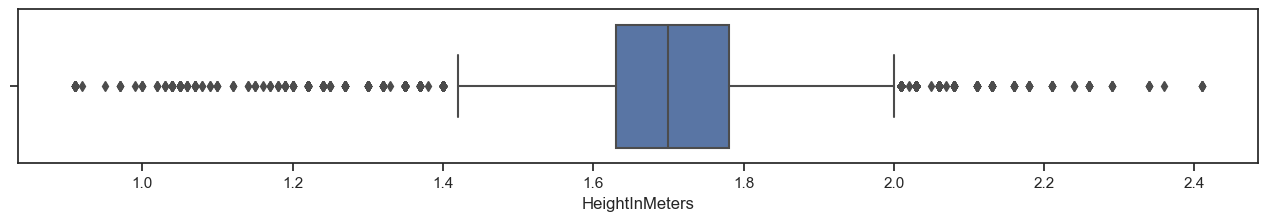

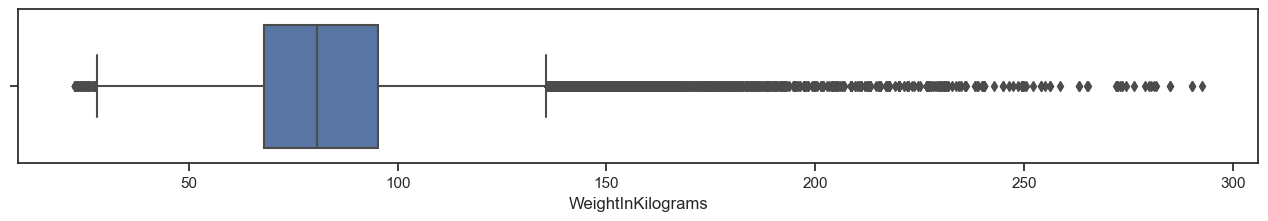

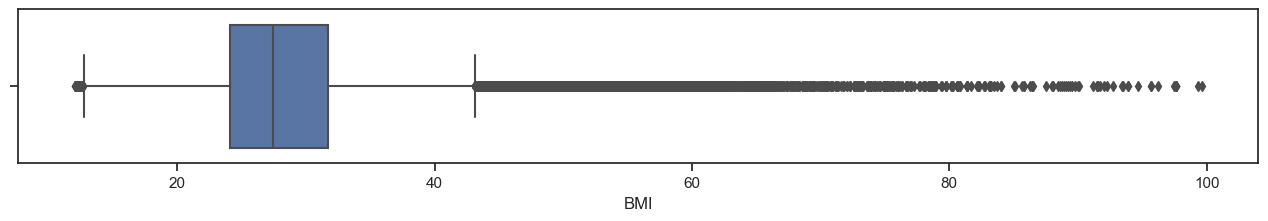

In [31]:
for col in df.describe().columns:
    sns.set_style('ticks')
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=df, x=col)
    plt.show()

In [32]:
#Function for extracting outliers in column of dataframe
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers, lower_limit, upper_limit

In [33]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df, 'SleepHours')
sleep_hours_outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
88,Alabama,Female,Excellent,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,1.0,NaN,No,...,1.60,54.43,21.26,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
95,Alabama,Male,Poor,NaN,0.0,Within past year (anytime less than 12 months ...,Yes,12.0,NaN,No,...,1.83,106.59,31.87,Yes,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
118,Alabama,Female,Poor,30.0,30.0,Within past year (anytime less than 12 months ...,No,18.0,NaN,Yes,...,1.50,47.17,21.01,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
127,Alabama,Male,Very good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,12.0,NaN,No,...,1.73,50.80,17.03,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
208,Alabama,Female,Poor,25.0,0.0,Within past year (anytime less than 12 months ...,Yes,12.0,NaN,No,...,1.63,136.08,51.49,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444948,Virgin Islands,Female,Fair,2.0,1.0,Within past year (anytime less than 12 months ...,Yes,18.0,1 to 5,No,...,1.65,99.79,36.61,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
445066,Virgin Islands,Male,Very good,NaN,0.0,Within past year (anytime less than 12 months ...,Yes,20.0,All,No,...,1.80,86.18,26.50,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
445103,Virgin Islands,Female,Good,10.0,0.0,Within past year (anytime less than 12 months ...,No,12.0,None of them,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445108,Virgin Islands,Female,Good,5.0,NaN,Within past year (anytime less than 12 months ...,Yes,18.0,None of them,No,...,1.55,58.97,24.56,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [34]:
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [35]:
# Dropping records with sleep less than 3 hours
df = df.drop(df[df['SleepHours'] < 3].index)
df.reset_index(drop=True, inplace=True)
df.shape

(439281, 40)

In [36]:
# Dropping record with sleep greater than 16 hourss
df = df.drop(df[df['SleepHours'] > 16].index)
df.reset_index(drop=True, inplace=True)
df.shape

(438855, 40)

In [37]:
height_outliers, lower_height, upper_height = get_outliers(df, 'HeightInMeters')
height_outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
551,Alabama,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,"6 or more, but not all",Yes,...,1.24,86.18,55.64,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,NaN
860,Alabama,Female,Poor,30.0,30.0,Within past year (anytime less than 12 months ...,No,9.0,1 to 5,Yes,...,1.22,136.08,91.55,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
887,Alabama,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,1.22,44.91,30.21,No,No,No,Yes,"Yes, received Tdap",No,No
1512,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,No,...,2.03,70.31,17.03,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
1529,Alabama,Male,Very good,0.0,0.0,Within past 5 years (2 years but less than 5 y...,No,8.0,NaN,No,...,2.01,95.25,23.66,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438430,Virgin Islands,Male,Very good,0.0,0.0,5 or more years ago,Yes,7.0,1 to 5,No,...,2.13,68.04,14.95,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
438456,Virgin Islands,Male,NaN,1.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,NaN,None of them,No,...,1.27,63.50,39.37,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
438584,Virgin Islands,Male,Poor,30.0,25.0,Within past year (anytime less than 12 months ...,No,5.0,NaN,Yes,...,2.01,106.14,26.36,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
438669,Virgin Islands,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,1.35,63.05,34.79,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [38]:
print(f"Lower Limit:{lower_height})\nUpper Limit:{upper_height})")

Lower Limit:1.4049999999999998)
Upper Limit:2.0050000000000003)


In [39]:
# Dropping records with height less than 1.3 meters
df = df.drop(df[df['HeightInMeters'] < 1.3].index)
df.reset_index(drop=True, inplace=True)
df.shape

(438593, 40)

In [40]:
# Dropping records with height greater than 2.1 meters
df = df.drop(df[df['HeightInMeters'] > 2.1].index)
df.reset_index(drop=True, inplace=True)
df.shape

(438491, 40)

In [41]:
weight_outliers, lower_weight, upper_weight = get_outliers(df, 'WeightInKilograms')
weight_outliers

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
48,Alabama,Female,Good,0.0,18.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.73,136.08,45.61,No,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
140,Alabama,Female,Fair,30.0,20.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.60,145.15,56.68,No,Yes,No,No,"Yes, received Tdap",No,No
156,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.83,158.76,47.47,No,No,Yes,NaN,"No, did not receive any tetanus shot in the pa...",No,No
206,Alabama,Female,Poor,25.0,0.0,Within past year (anytime less than 12 months ...,Yes,12.0,NaN,No,...,1.63,136.08,51.49,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
333,Alabama,Female,Fair,30.0,8.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.85,136.08,39.58,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438047,Virgin Islands,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,"6 or more, but not all",No,...,1.73,136.08,45.61,No,Yes,No,No,"No, did not receive any tetanus shot in the pa...",Yes,No
438223,Virgin Islands,Male,Good,5.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,1 to 5,No,...,1.83,158.76,47.47,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
438351,Virgin Islands,Male,Good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.83,170.10,50.86,Yes,Yes,No,NaN,"Yes, received tetanus shot but not sure what type",No,No
438371,Virgin Islands,Female,Good,2.0,NaN,Within past year (anytime less than 12 months ...,No,NaN,1 to 5,No,...,1.68,163.29,58.10,No,Yes,Yes,No,NaN,Yes,No


In [42]:
print(f"Lower Limit:{lower_weight})\nUpper Limit:{upper_weight})")

Lower Limit:27.225000000000016)
Upper Limit:136.065)


In [43]:
# Dropping records with weight less than 40 kg
df = df.drop(df[df['WeightInKilograms'] < 40].index)
df.reset_index(drop=True, inplace=True)
df.shape

(437895, 40)

In [44]:
# Dropping records with weight greater than 200 kg
dff = df.drop(df[df['WeightInKilograms'] > 200].index)
df.reset_index(drop=True, inplace=True)
df.shape

(437895, 40)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437895 entries, 0 to 437894
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      437895 non-null  object 
 1   Sex                        437895 non-null  object 
 2   GeneralHealth              436819 non-null  object 
 3   PhysicalHealthDays         427448 non-null  float64
 4   MentalHealthDays           429259 non-null  float64
 5   LastCheckupTime            429980 non-null  object 
 6   PhysicalActivities         436942 non-null  object 
 7   SleepHours                 432727 non-null  float64
 8   RemovedTeeth               427033 non-null  object 
 9   HadHeartAttack             437895 non-null  object 
 10  HadAngina                  434378 non-null  object 
 11  HadStroke                  436845 non-null  object 
 12  HadAsthma                  436483 non-null  object 
 13  HadSkinCancer              43

In [46]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1076
PhysicalHealthDays           10447
MentalHealthDays              8636
LastCheckupTime               7915
PhysicalActivities             953
SleepHours                    5168
RemovedTeeth                 10862
HadHeartAttack                   0
HadAngina                     3517
HadStroke                     1050
HadAsthma                     1412
HadSkinCancer                 2730
HadCOPD                       1805
HadDepressiveDisorder         2372
HadKidneyDisease              1581
HadArthritis                  2278
HadDiabetes                    800
DeafOrHardOfHearing          19887
BlindOrVisionDifficulty      20788
DifficultyConcentrating      23352
DifficultyWalking            23172
DifficultyDressingBathing    23083
DifficultyErrands            24775
SmokerStatus                 34357
ECigaretteUsage              34544
ChestScan                    54514
RaceEthnicityCategor

In [47]:
# dropping records with missing values
df = df.dropna()

df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

C:\Users\Tota\AppData\Local\Temp\ipykernel_28508\3288832412.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


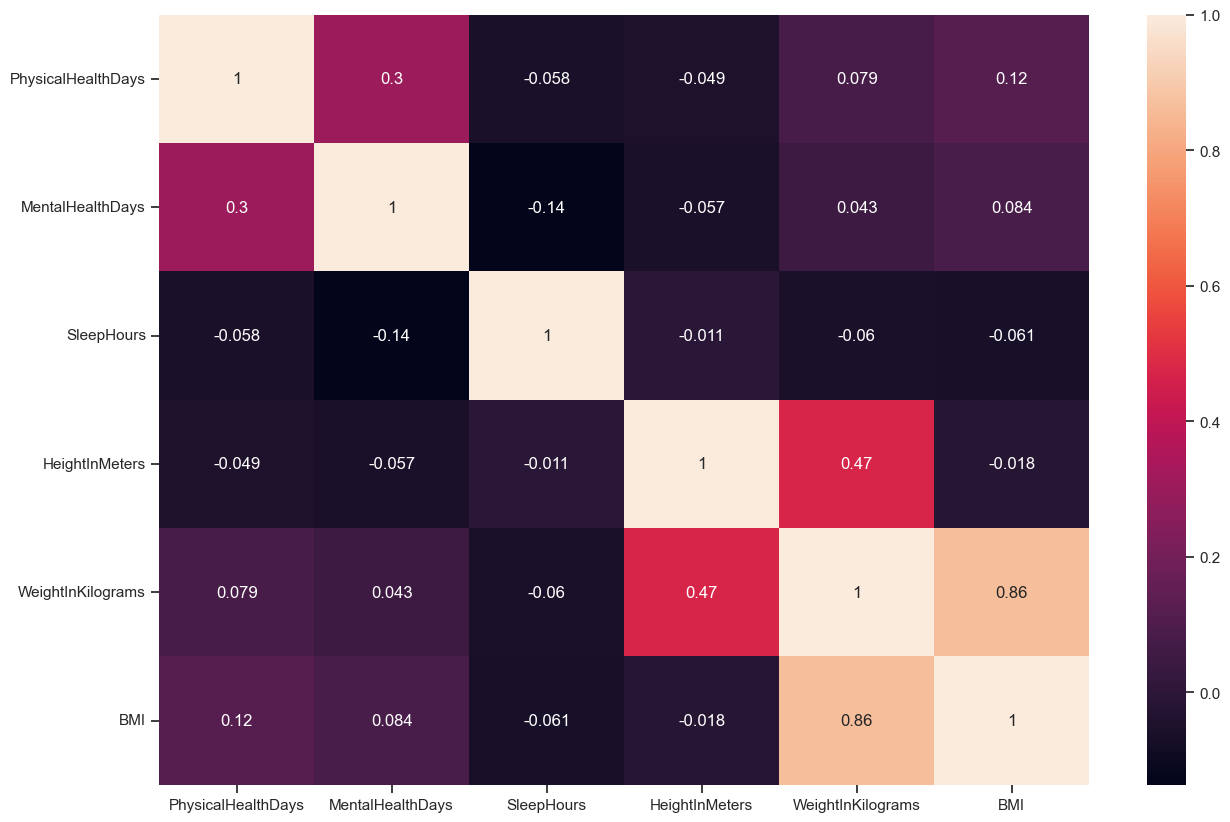

In [48]:
# correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- There's a high correlation between BMI and Weight so we can drop one of these columns.

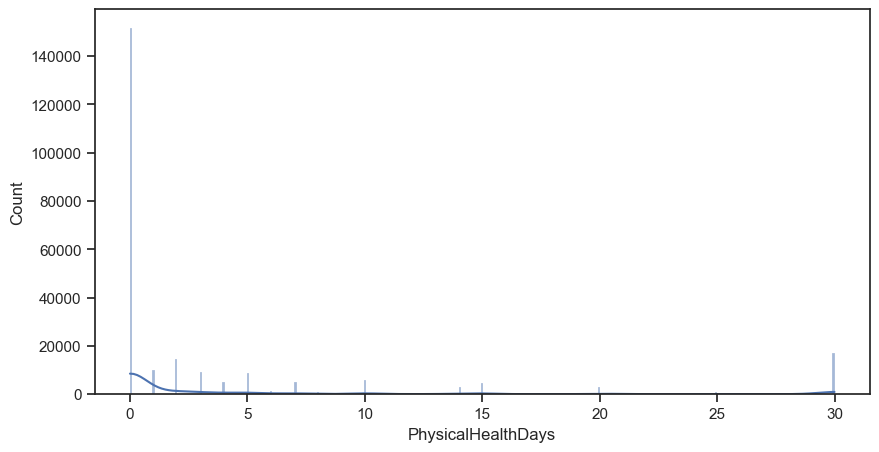

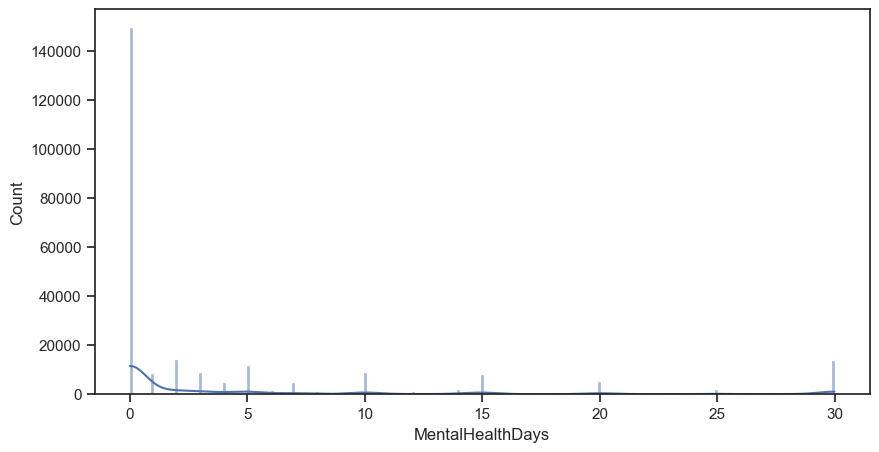

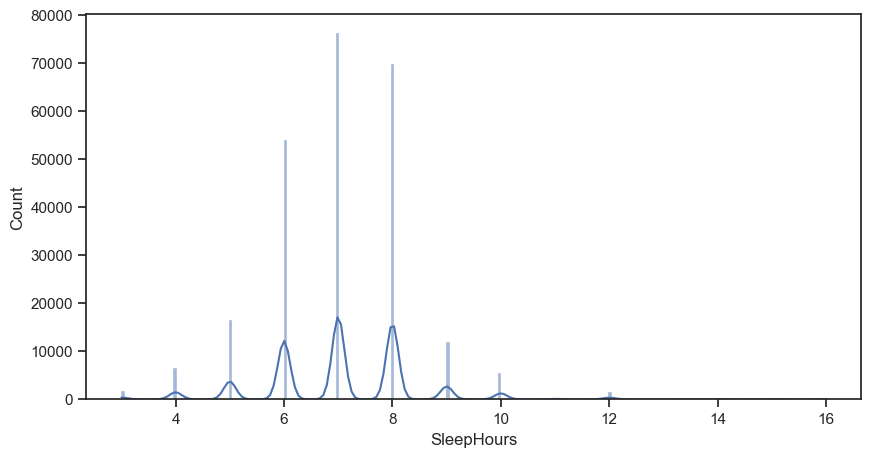

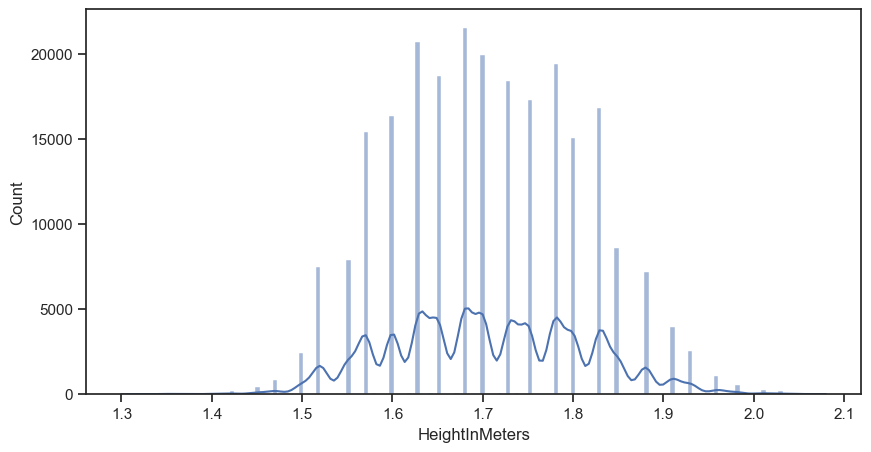

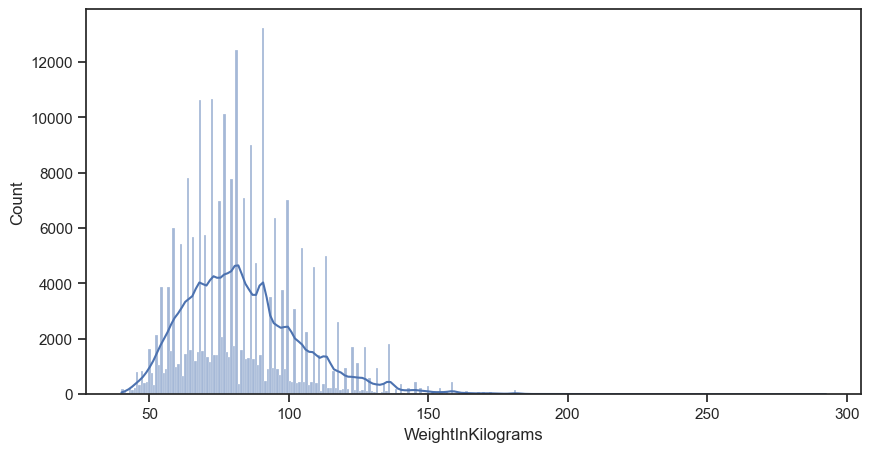

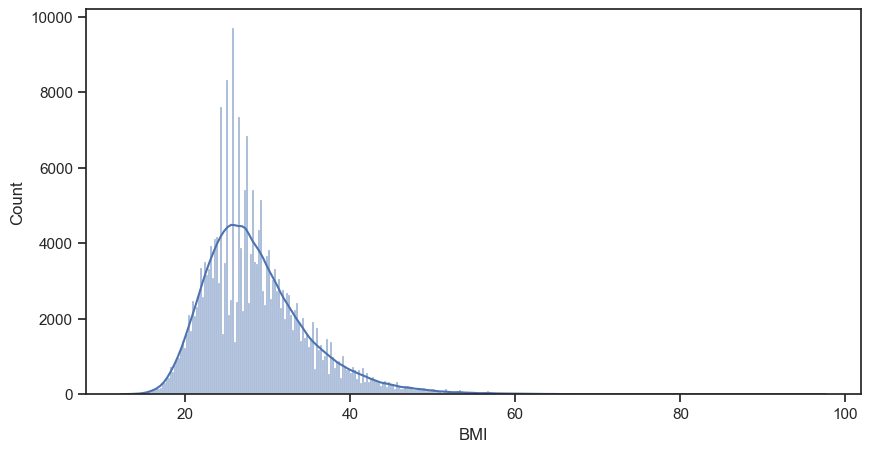

In [49]:
# show distribution of numerical columns
numerical = df.select_dtypes(include=[np.number]).columns
for i in numerical:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i], kde=True)
    plt.show()

In [51]:
# encode categorical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical = df.select_dtypes(include=['object'])
for i in categorical:
    df[i] = encoder.fit_transform(df[i])
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
338,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
339,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
341,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1
342,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,1
343,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


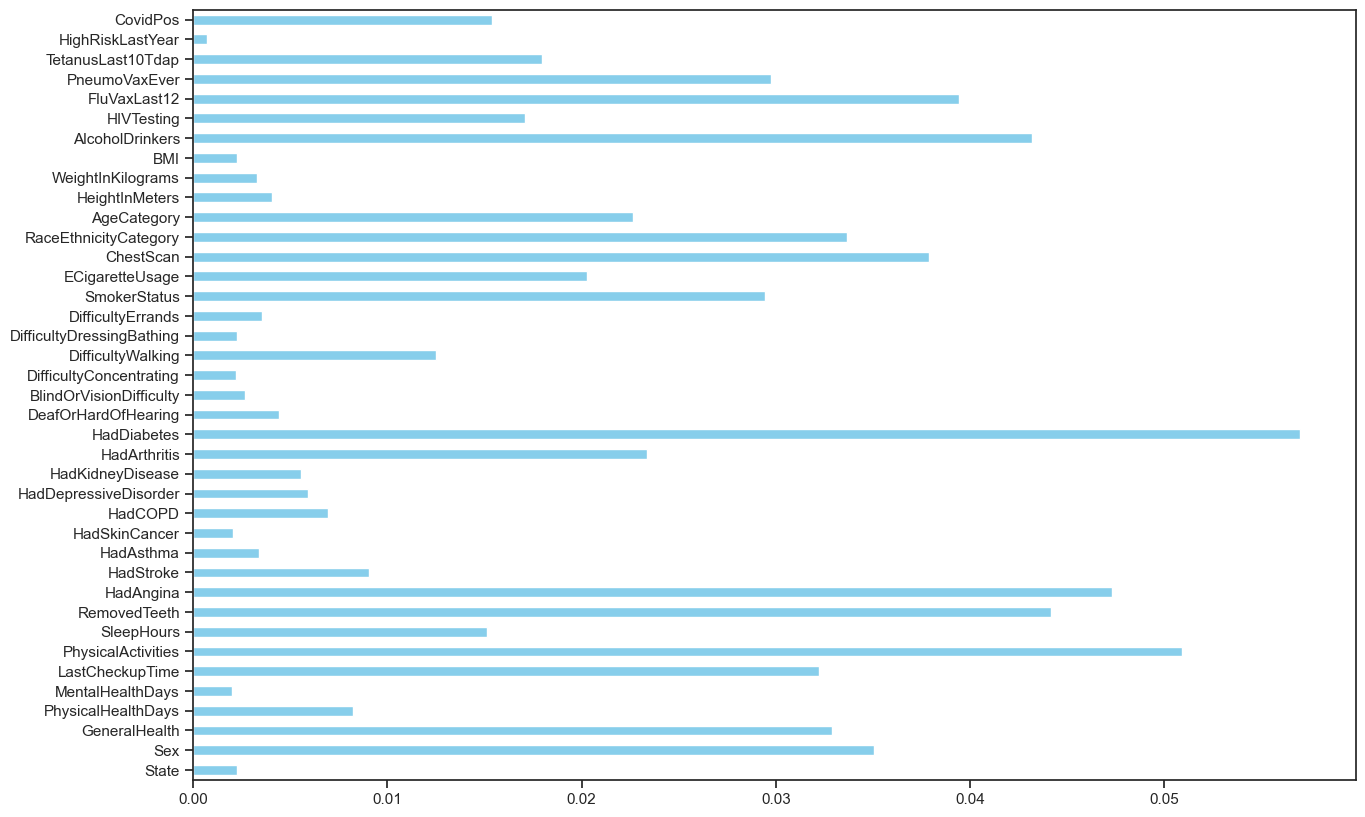

In [54]:
# feature importance
from sklearn.feature_selection import mutual_info_classif
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

importance = mutual_info_classif(X, y)
feat_importance = pd.Series(importance, X.columns)
plt.figure(figsize=(15, 10))
feat_importance.plot(kind='barh', color='skyblue')
plt.show()


In [55]:
# select features to drop
drop_features = feat_importance[feat_importance < 0.01]
drop_features

State                        0.002238
PhysicalHealthDays           0.008240
MentalHealthDays             0.001980
HadStroke                    0.009057
HadAsthma                    0.003380
HadSkinCancer                0.002060
HadCOPD                      0.006957
HadDepressiveDisorder        0.005896
HadKidneyDisease             0.005546
DeafOrHardOfHearing          0.004443
BlindOrVisionDifficulty      0.002663
DifficultyConcentrating      0.002224
DifficultyDressingBathing    0.002274
DifficultyErrands            0.003530
HeightInMeters               0.004035
WeightInKilograms            0.003268
BMI                          0.002257
HighRiskLastYear             0.000735
dtype: float64

In [56]:
# drop features
df.drop(drop_features.index, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244150 entries, 338 to 437893
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    244150 non-null  int32  
 1   GeneralHealth          244150 non-null  int32  
 2   LastCheckupTime        244150 non-null  int32  
 3   PhysicalActivities     244150 non-null  int32  
 4   SleepHours             244150 non-null  float64
 5   RemovedTeeth           244150 non-null  int32  
 6   HadHeartAttack         244150 non-null  int32  
 7   HadAngina              244150 non-null  int32  
 8   HadArthritis           244150 non-null  int32  
 9   HadDiabetes            244150 non-null  int32  
 10  DifficultyWalking      244150 non-null  int32  
 11  SmokerStatus           244150 non-null  int32  
 12  ECigaretteUsage        244150 non-null  int32  
 13  ChestScan              244150 non-null  int32  
 14  RaceEthnicityCategory  244150 non-

## **Data Scaling**

In [73]:
# split data into features and target variable
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# # scale 'EcigaretteUsage' and 'HadDiabetes' columns using standard scaler
# from sklearn.preprocessing import StandardScaler

# scaler_standard = StandardScaler()
# X_train[['ECigaretteUsage', 'HadDiabetes']] = scaler_standard.fit_transform(X_train[['ECigaretteUsage', 'HadDiabetes']])
# X_test[['ECigaretteUsage', 'HadDiabetes']] = scaler_standard.transform(X_test[['ECigaretteUsage', 'HadDiabetes']])

# # scale rest of the columns using minmax scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler_minmax = MinMaxScaler()
# other_columns = X_train.drop(['ECigaretteUsage', 'HadDiabetes'], axis=1).columns

# X_train[other_columns] = scaler_minmax.fit_transform(X_train[other_columns])
# X_test[other_columns] = scaler_minmax.transform(X_test[other_columns])

In [79]:
# scale all columns using standard scaler
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

X_train = scaler_standard.fit_transform(X_train)
X_test = scaler_standard.transform(X_test)

In [84]:
# save the scaler
import joblib
joblib.dump(scaler_standard, 'scaler.pkl')

['scaler.pkl']

In [52]:
# from sklearn.preprocessing import StandardScaler

# def model_hypertun(model, param_grid, X, y):


#     skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)




#     x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.35)
#     scaler= StandardScaler()
#     scaler.fit(x_train)

#     X_train_scaled = scaler.transform(x_train)
#     X_test_scaled = scaler.transform(x_test)



#     model_grid = HalvingGridSearchCV(model, grid, factor=3,cv=skf, n_jobs=-1,random_state=42,verbose=1,
#                                          scoring='f1',return_train_score=True)


#     model_grid.fit(X_train_scaled,y_train)




#     print("tuned hpyerparameters :(best parameters) ",model_grid.best_params_)
#     print("f1 score :",model_grid.best_score_)

#     return model_grid.best_estimator_

In [78]:
# from sklearn.ensemble import RandomForestClassifier

# randomforest=RandomForestClassifier()
# grid={'n_estimators': [ 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 
#           'max_depth': [3, 6, 9,12], 'min_samples_split': [3, 6, 9],'min_samples_leaf': [3, 6, 9],"class_weight":["balanced"]}




# randomforest_balance=model_hypertun(randomforest,grid, X, y)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 943
max_resources_: 229251
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 324
n_resources: 943
Fitting 7 folds for each of 324 candidates, totalling 2268 fits
----------
iter: 1
n_candidates: 108
n_resources: 2829
Fitting 7 folds for each of 108 candidates, totalling 756 fits
----------
iter: 2
n_candidates: 36
n_resources: 8487
Fitting 7 folds for each of 36 candidates, totalling 252 fits


C:\Users\hadee\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 3
n_candidates: 12
n_resources: 25461
Fitting 7 folds for each of 12 candidates, totalling 84 fits
----------
iter: 4
n_candidates: 4
n_resources: 76383
Fitting 7 folds for each of 4 candidates, totalling 28 fits


C:\Users\hadee\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
f1 score : 0.4182961175914904


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model with class weights
# class_weights = {0: , 1: weighting[1]}
rf_model = RandomForestClassifier(class_weight="balanced", max_depth = 12, max_features= 'sqrt', min_samples_leaf = 6, min_samples_split=6,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[39711  6511]
 [  739  1869]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92     46222
           1       0.22      0.72      0.34      2608

    accuracy                           0.85     48830
   macro avg       0.60      0.79      0.63     48830
weighted avg       0.94      0.85      0.89     48830



In [83]:
# save the model
import joblib
joblib.dump(rf_model, 'heart_attack_model.pkl')

['heart_attack_model.pkl']

In [81]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Initialize the Random Forest model with class weights
# class_weights = {0: 0.5, 1: 10}
# rf_model = RandomForestClassifier(class_weight=class_weights, max_depth = 12, max_features= 'sqrt', min_samples_leaf = 6, min_samples_split=6,random_state=42)

# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_model.predict(X_test)

# # Evaluate the model
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[38645  7577]
 [  668  1940]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90     46222
           1       0.20      0.74      0.32      2608

    accuracy                           0.83     48830
   macro avg       0.59      0.79      0.61     48830
weighted avg       0.94      0.83      0.87     48830

